Convolutional Neural Networks
Choose 4 dataset that you're interested in from among these options (or choose your own data set as long as it's large enough):

Grape Disease Detection Data

Indian Bird Data

Skin Cancer Classification

Fruit and Veg Detection Data

Large Scale Fish Data

Berkeley Segmentation Data

Rice Classification

Date Fruit (Hurma) Classification

More Data Sets

Then Build a Deep CONVOLUTIONAL Neural Network (No Recurrent Layers, no Transfer Learning , no Generative Models) using keras/tensorflow (at least 5 Convolutional Layers, and at least 3 Pooling Layers) to do one of the following tasks:

Classify Images (e.g. Hot Dog vs. Not a Hot Dog)
Compress Images (e.g. with a Denoising Convolutional AutoEncoder)
Detect/Segment Objects (e.g. what pixels in the image contain a cat?)
Make sure that:

your NN has some sort of regularization (or multiple types if needed)
you've properly formatted and inputted your data into the network
your model architechture and loss function are appropriate for the problem
you print out at least 2 metrics for both train and test data to examine
Save the model and create a Streamlit app and upload to HuggingFace.co (https://HuggingFace.co) and share the link here.
Then Build a Deep CONVOLUTIONAL Neural Network (with Recurrent Layers, Transfer Learning like VGG16, ResNet50, Xception etc and Generative Models) repeat the above process.

Then create a technical report discussing your model building process, the results, and your reflection on it. The report should follow the format in the example including an Introduction, Analysis, Methods, Results, and Reflection section.

Introduction
An introduction should introduce the problem you're working on, give some background and relevant detail for the reader, and explain why it is important.

Analysis
Any exploratory analysis of your data, and general summarization of the data (e.g. summary statistics, correlation heatmaps, graphs, information about the data...). This can also include any cleaning and joining you did.

Methods
Explain the structure of your model and your approach to building it. This can also include changes you made to your model in the process of building it. Someone should be able to read your methods section and generally be able to tell exactly what architechture you used.

Results
Detailed discussion of how your model performed, and your discussion of how your model performed.

Reflection
Reflections on what you learned/discovered in the process of doing the assignment. Things you would do differently in the future, ways you'll approach similar problems in the future, etc.

What to Turn In
PDF of your technical report
your code as a .py, .ipynb, or link to github (you must turn it in either as a file, or a link to something that has timestamps of when the file was last edited)
a README file as a .txt or .md

# 1. 25 Indian Bird species with 22.6k images
https://www.kaggle.com/datasets/arjunbasandrai/25-indian-bird-species-with-226k-images

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Rescaling
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
# Define the data directory
data_dir = "/kaggle/input/25-indian-bird-species-with-226k-images/training_set/training_set"

# Load the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, # Path to the data directory
    label_mode='categorical',
    image_size=(128, 128),  # Görüntüleri 128x128 piksel boyutuna yeniden boyutlandır
    subset='training',
    batch_size=32,  # Her bir batch'teki görüntü sayısı
    shuffle=True, # Verileri rastgele karıştır
    seed=123, # Random seed for reproducibility
    validation_split=0.2
)

# Load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, # Path to the data directory
    label_mode='categorical',
    image_size=(128, 128),  # Reduced image size
    subset='validation', # Specify this as the validation dataset
    batch_size=32,  # Her bir batch'teki görüntü sayısı
    validation_split=0.2,
    seed=123 # Random seed for reproducibility
)

Found 22620 files belonging to 25 classes.
Using 18096 files for training.
Found 22620 files belonging to 25 classes.
Using 4524 files for validation.


In [13]:
# Normalize pixel values between 0 and 1
normalization_layer = Rescaling(1./255) # Piksel değerlerini normalleştirmek için Rescaling katmanı

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Map normalization to images in the training dataset
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [15]:
# Create the model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Input layer'ı açıkça belirt
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(25, activation='softmax')  # num_classes kullan
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [17]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 124s 105ms/step - accuracy: 0.0408 - loss: 3.2193 - val_accuracy: 0.0356 - val_loss: 3.2174
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 137s 103ms/step - accuracy: 0.0376 - loss: 3.2167 - val_accuracy: 0.0356 - val_loss: 3.2174
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 116s 103ms/step - accuracy: 0.0375 - loss: 3.2166 - val_accuracy: 0.0356 - val_loss: 3.2174
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 142s 103ms/step - accuracy: 0.0367 - loss: 3.2164 - val_accuracy: 0.0356 - val_loss: 3.2174
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 117s 103ms/step - accuracy: 0.0380 - loss: 3.2165 - val_accuracy: 0.0356 - val_loss: 3.2175
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 141s 103ms/step - accuracy: 0.0396 - loss: 3.2165 - val_accuracy: 0.0356 - val_loss: 3.2175
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 116s 103ms/step - accuracy: 0.0395 - loss: 3.2164 - val_accuracy: 0.0356 - val_loss: 3.2175
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 142s 102ms/step - ac

In [ ]:
train_loss, train_acc, train_precision, train_recall = model.evaluate(train_ds)
test_loss, test_acc, test_precision, test_recall = model.evaluate(val_ds)

print("Train Accuracy:", train_acc)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Test Accuracy:", test_acc)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

model.save('bird_classification_model.h5')

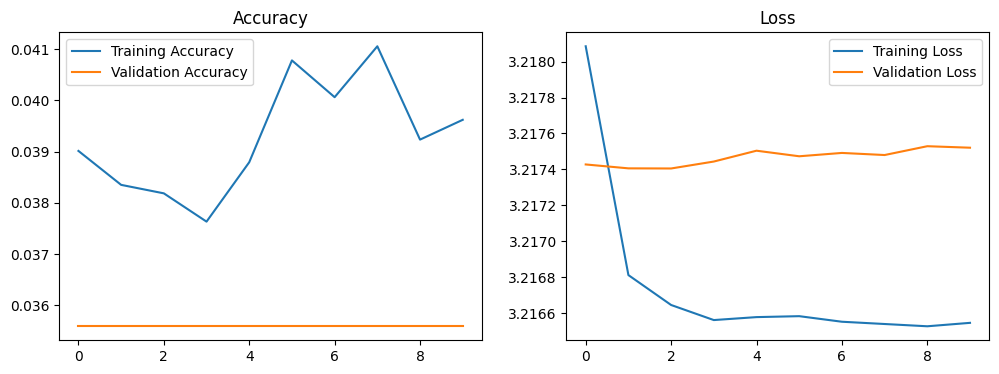

Model saved as 'bird_classification_model.h5'


In [18]:
import matplotlib.pyplot as plt

# Eğitim metriklerini görselleştir
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Modeli kaydet
model.save('bird_classification_model.h5')
print("Model saved as 'bird_classification_model.h5'")